# Classification using MLP (numpy implementation from scratch)

In [1]:
import numpy as np 
import copy
import matplotlib.pyplot as plt 

from dataset_manipulation import generate_data
from loss_functions import NNLLossWithLogits
from mlp import MLP
from util import StandardScaler

## Generate and plot data

In [2]:
nbr_class = 2
input_dim = 2

In [3]:
X, Y = generate_data(nbr_class, 100, input_dim, scale=2)

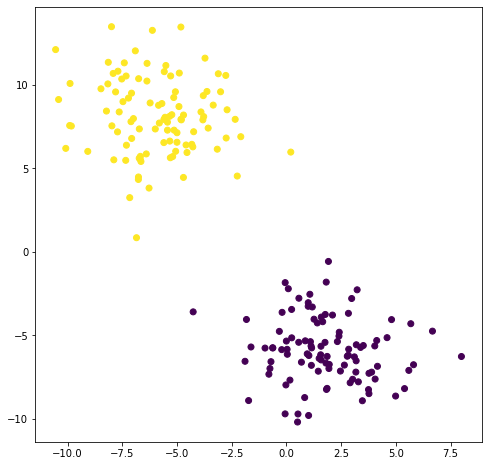

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=np.argmax(Y, axis=1));

## Standardize data

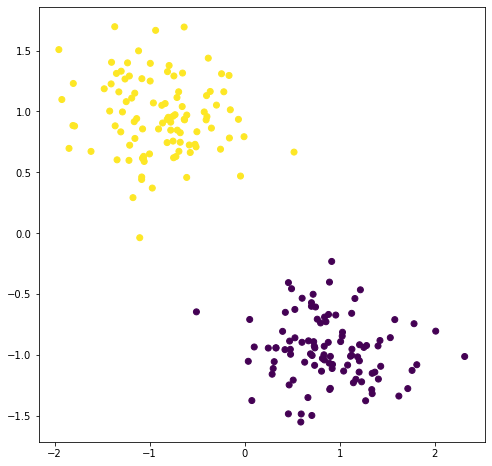

In [5]:
std_scaler = StandardScaler()

X = std_scaler(X)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=np.argmax(Y, axis=1));

## Run

In [6]:
n = int(X.shape[0] * 0.2)
train_X, val_X, test_X = X[0:-2*n], X[-2*n:-n], X[-n:] 
train_Y, val_Y, test_Y = Y[0:-2*n], Y[-2*n:-n], Y[-n:]

In [7]:
num_layers = 2
hidden_dim = 20

mlp  = MLP(num_layers, input_dim, hidden_dim, nbr_class)
loss = NNLLossWithLogits()

In [8]:
from sklearn.metrics import accuracy_score

epochs = 15
best_acc = -1.0
best_mlp = None
lr = 0.01

for e in range(epochs):
    train_out = mlp(train_X)
    train_loss, grad = loss(train_out, train_Y)
    
    val_out = mlp(val_X, eval=True)
    val_loss, _ = loss(val_out, val_Y)
    
    train_acc = accuracy_score( np.argmax(train_Y, axis=1), np.argmax(train_out, axis=1))
    val_acc   = accuracy_score( np.argmax(val_Y  , axis=1), np.argmax(val_out  , axis=1))
    print(f"EPOCH {e:2d}:   -- Train loss: {train_loss:.5f}    -- Train ACC: {train_acc*100.0:.2f}   -- Val loss: {val_loss:.5f}   -- Val ACC: {val_acc*100.0:.2f}")

    
    if val_acc > best_acc:
        best_ycc = val_acc
        best_mlp = copy.deepcopy(mlp)
    
    mlp.backward(grad, lr)

EPOCH  0:   -- Train loss: 0.34564    -- Train ACC: 54.17   -- Val loss: 0.35301   -- Val ACC: 42.50
EPOCH  1:   -- Train loss: 0.34507    -- Train ACC: 54.17   -- Val loss: 0.35048   -- Val ACC: 42.50
EPOCH  2:   -- Train loss: 0.34379    -- Train ACC: 54.17   -- Val loss: 0.35089   -- Val ACC: 42.50
EPOCH  3:   -- Train loss: 0.34261    -- Train ACC: 54.17   -- Val loss: 0.35167   -- Val ACC: 42.50
EPOCH  4:   -- Train loss: 0.34177    -- Train ACC: 54.17   -- Val loss: 0.35105   -- Val ACC: 42.50
EPOCH  5:   -- Train loss: 0.34058    -- Train ACC: 54.17   -- Val loss: 0.34983   -- Val ACC: 42.50
EPOCH  6:   -- Train loss: 0.33850    -- Train ACC: 54.17   -- Val loss: 0.34771   -- Val ACC: 42.50
EPOCH  7:   -- Train loss: 0.33487    -- Train ACC: 54.17   -- Val loss: 0.34421   -- Val ACC: 42.50
EPOCH  8:   -- Train loss: 0.32828    -- Train ACC: 54.17   -- Val loss: 0.33796   -- Val ACC: 42.50
EPOCH  9:   -- Train loss: 0.31596    -- Train ACC: 56.67   -- Val loss: 0.32619   -- Val A

In [9]:
test_out = best_mlp(test_X, eval=True)
test_acc = accuracy_score( np.argmax(test_Y, axis=1), np.argmax(test_out, axis=1))
print(F"TEST ACC: {test_acc*100.0:.2f}")

TEST ACC: 100.00
